<a href="https://colab.research.google.com/github/EvoDmiK/AI_study/blob/main/basic/pytorch/0.pytorch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 참고자료**
## **0-1. 도서**
- 한빛 미디어 | 펭귄브로의 3분 딥러닝 - 파이토치 맛

## **0-2. 웹사이트**
## **0-3. 데이터 셋** 
- 펭귄브로의 3분 딥러닝 깃허브 | [깃헙 링크](https://github.com/keon/3-min-pytorch/blob/master/03-%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%98%EB%8A%94_ANN/broken_image_t.p)

# **1. 파이토치 기초를 배워보자**
- 텐서는 파이토치에서 다양한 수식을 계산하는데 가장 기본적인 자료 구조이다.  
- 수학의 벡터나 행렬을 일반화한 개념으로 숫자들을 특정한 모양으로 배열
- 텐서에는 차원이라는 개념이 있음.  
(1) 0차원 텐서 : 스칼라 (scalar)   
(2) 1차원 텐서 : 벡터 (vector)  
(3) 2차원 텐서 : 행렬 (matrix)  

## **1-1. 텐서를 다뤄보자**
#### **(a) 텐서를 만들어보자**

In [7]:
import torch

## 3 x 3 텐서 만들기
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f'first tensor : \n{x}')

## 텐서의 shape(size)를 확인하는 법
print(f'tensor size : {x.size()} \ntensor shape : {x.shape}')

## 텐서의 차원(dimension | rank)를 확인하는 법
print(f'tensor dimension : {x.ndimension()}')

first tensor : 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor size : torch.Size([3, 3]) 
tensor shape : torch.Size([3, 3])
tensor dimension : 2


#### **(b) 텐서를 변형해보자**
- 파이토치에서는 unsqueeze, squeeze, view 함수로  텐서의 랭크(차원)과 shape를 인위적으로 바꿀수 있다.

(1) unsqueeze() | 텐서의 랭크를 늘려줌.  
(2) squeeze()   | 텐서의 랭크 중 크기가 1인 랭크 삭제하여 텐서의 랭크를 줄임.  
(3) view()      | 텐서의 랭크 조절 뿐만 아니라 텐서의 모양도 바꿀 수 있음.  

In [8]:
## unsqueeze() 함수로 차원 늘리기
## 텐서 x에서 첫 번째 자리에 1이라는 차원값을 추가해 차원을 늘림.
x = torch.unsqueeze(x, 0)
print(f'unsqueezed tensor : \n{x}')
print(f'tensor size : {x.size()} \ntensor shape : {x.shape}')
print(f'tensor dimension : {x.ndimension()}')

unsqueezed tensor : 
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
tensor size : torch.Size([1, 3, 3]) 
tensor shape : torch.Size([1, 3, 3])
tensor dimension : 3


In [9]:
## squeeze() 함수로 차원 줄이기
## 크기가 1인 랭크 (0번째 위치)의 랭크를 삭제하여 차원을 줄임.
x = torch.squeeze(x)
print(f'squeezed tensor : \n{x}')
print(f'tensor size : {x.size()} \ntensor shape : {x.shape}')
print(f'tensor dimension : {x.ndimension()}')

squeezed tensor : 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor size : torch.Size([3, 3]) 
tensor shape : torch.Size([3, 3])
tensor dimension : 2


In [10]:
## view() 함수로 텐서의 모양 바꿔보기 
## 3 x 3 사이즈의 텐서를 1 x 9 사이즈의 텐서로 변경
x = x.view(9)
print(f'view tensor : {x}')
print(f'tensor size : {x.size()} \ntensor shape : {x.shape}')
print(f'tensor dimension : {x.ndimension()}')

view tensor : tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor size : torch.Size([9]) 
tensor shape : torch.Size([9])
tensor dimension : 1


#### **(!) view() 함수는 텐서의 원소 개수를 변경할 수 없다.**
e.g ) 1 x 9 사이즈의 텐서를 2 x 4 사이즈의 텐서로 변경할 수 없다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;물론 3 x 3 사이즈의 텐서도 2 x 4 사이즈의 텐서로 변경할 수 없다.

In [11]:
try: 
  x = x.view(2, 4)

except Exception as e:
  print(f'ERROR : {e}')

ERROR : shape '[2, 4]' is invalid for input of size 9


#### **(c) 텐서끼리 행렬곱을 해보자**
- 2차원 텐서(행렬)에서 행렬의 높이를 행, 너비를 열이라고 한다.  
- 두 행렬 A,B가 행렬 곱을 하기 위해선 다음 두 조건이 만족되어야 한다.  
(1) A의 열 수와 B의 행 수는 같아야 한다.  
(2) 행렬곱 A*B의 결과 행렬은 행 개수는 A와 같고,  열 개수는 B와 같다.  

In [13]:
## w | 정규분포를 따르는 무작위 실수형 5x3 행렬
## x | 3 x 2 행렬
## b | 5 x 2 행렬 (왜냐하면, w와 x를 행렬곱 연산한 결과가 5 x 2 행렬이기 때문에)

w = torch.randn(5, 3, dtype = torch.float)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
b = torch.randn(5, 2, dtype = torch.float)

print(f'weight size : {w.size()}')
print(f'input size  : {x.size()}')
print(f'bias size   : {b.size()}')

output = torch.mm(w, x) + b
print(f'output size : {output.size()}')

weight size : torch.Size([5, 3])
input size  : torch.Size([3, 2])
bias size   : torch.Size([5, 2])
output size : torch.Size([5, 2])


## **1-2. AutoGrad** 
- pytorch에서 미분 계산을 자동으로 해주는 기능
- AutoGrad 기능이 미분값을 자동으로 계산한 결과가 미분하려는 텐서의 grad에 저장

In [15]:
## w | 값이 1.0인 스칼라 텐서
w = torch.tensor(1.0, requires_grad = True)

a = w*3
l = a**2
l.backward()

## i.e) l = (3*w)**2 = 9*w**2
print(f'l을 w로 미분한 값 : {w.grad.item()}')

l을 w로 미분한 값 : 18.0


In [17]:
!cp "drive/MyDrive/Colab Notebooks/dataset/broken_image_t.p" dummy_image.p

### **(a) 손상된 이미지 복원**
- 랜덤으로 생성한 노이즈 이미지와 손상된 이미지가 같을 경우  
  손상된 이미지와 생성된 이미지의 원본이 동일할 것이라는 가정에서 시작

In [18]:
import matplotlib.pyplot as plt
import pickle

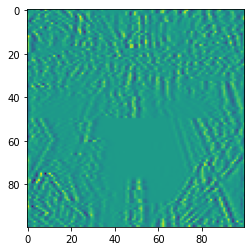

In [20]:
dummy_image = pickle.load(open('dummy_image.p', 'rb'), encoding = 'latin1')
dummy_image = torch.FloatTensor(dummy_image)

plt.imshow(dummy_image.view(100, 100))

In [23]:
def weird_function(x, num_iters = 5):
  hypo   = x
  filter = torch.tensor([-1./3, -1./3, -1./3])

  for idx in range(num_iters):
    dummy_tensor = torch.tensor([1.0*0])
    hypo_l = torch.cat((dummy_tensor, hypo[:-1]), 0)
    hypo_r = torch.cat((hypo[1:], dummy_tensor), 0)

    hypo = filter[0]*hypo + filter[2]*hypo_l + filter[1]*hypo_l

    if idx % 2 == 0:
      hypo = torch.cat((hypo[hypo.shape[0]//2:], hypo[:hypo.shape[0]//2]), 0)
    
    return hypo

## 손상된 이미지와 랜덤 노이즈 이미지를 입력하여 얻은 거리로 로스를 구하는 함수
loss_function = lambda hypo, noise: torch.dist(hypo, noise)

In [33]:
## 손상된 이미지와 동일한 크기의 랜덤 이미지 생성
noise_tensor = torch.randn(10000, dtype = torch.float)

## 하이퍼 파라미터
lr, epochs = 1e-2, 500000

## 학습 진행
for epoch in range(epochs):
  ## 랜덤하게 생성한 노이즈 이미지 변수에 대해 미분이 되도록 설정
  noise_tensor.requires_grad_(True)

  ## 노이즈 이미지를 weird_function에 입력하여 손상된 이미지와 비교할 이미지 생성
  noise_image = weird_function(noise_tensor)
  
  ## 두 이미지의 거리를 계산하여 유사도 비교
  loss = loss_function(noise_image, dummy_image)

  ## loss를 noise_tensor로 미분하여 기울기를 얻음.
  ## d(loss) / d(noise_tensor)
  loss.backward()

  ## AutoGrad 기능을 이용하지 않고
  ## 직접 구현한 Gradient Descent를 사용하여, 자동 기울기 계산 비활성화
  with torch.no_grad(): noise_tensor -= lr*noise_tensor.grad

  ## 10000 epoch마다 loss값 출력하도록 함.
  if epoch % 10000 == 0: print(f'[{epoch+1}/{epochs}] loss value : {loss.item():.2f}')


[1/500000] loss value : 74.07
[10001/500000] loss value : 50.17
[20001/500000] loss value : 49.53
[30001/500000] loss value : 49.29
[40001/500000] loss value : 48.91
[50001/500000] loss value : 48.69
[60001/500000] loss value : 49.52
[70001/500000] loss value : 49.58
[80001/500000] loss value : 49.70
[90001/500000] loss value : 49.58
[100001/500000] loss value : 49.53
[110001/500000] loss value : 49.96
[120001/500000] loss value : 49.81
[130001/500000] loss value : 49.31
[140001/500000] loss value : 49.39
[150001/500000] loss value : 49.77
[160001/500000] loss value : 49.52
[170001/500000] loss value : 48.80
[180001/500000] loss value : 48.97
[190001/500000] loss value : 49.18
[200001/500000] loss value : 49.26
[210001/500000] loss value : 49.10
[220001/500000] loss value : 49.58
[230001/500000] loss value : 49.07
[240001/500000] loss value : 49.50
[250001/500000] loss value : 49.79
[260001/500000] loss value : 49.44
[270001/500000] loss value : 49.18
[280001/500000] loss value : 49.06

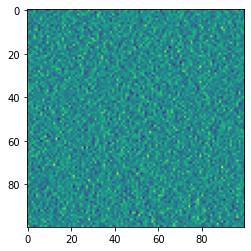

In [34]:
plt.imshow(noise_tensor.view(100, 100).data)